#  Instacart Market Basket Analysis EDA
This notebook uses a dataset from [Kaggle's Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis) competition:
>In this competition, Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## When do people order?

In [2]:
orders = pd.read_csv('orders.csv')
orders.shape

(3421083, 7)

In [3]:
orders.days_since_prior_order.fillna(orders.days_since_prior_order.median(), inplace=True)
orders.days_since_prior_order = orders.days_since_prior_order.apply(int)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,7
1,2398795,1,prior,2,3,7,15
2,473747,1,prior,3,3,12,21
3,2254736,1,prior,4,4,7,29
4,431534,1,prior,5,4,15,28


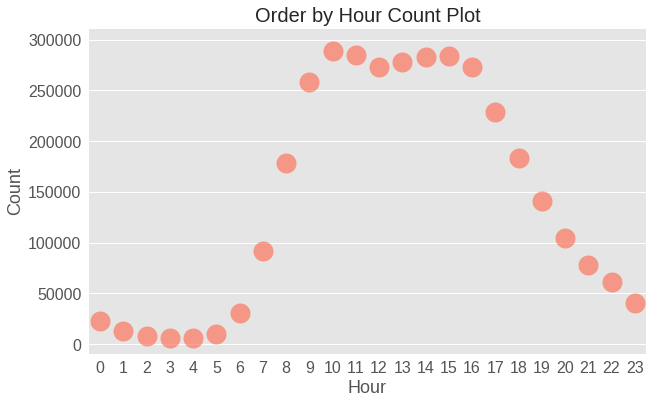

In [4]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

data = orders.groupby('order_id')['order_hour_of_day'].aggregate('sum').reset_index()
data = data.order_hour_of_day.value_counts()

sns.stripplot(x=data.index, y=data, color='tomato', size=20, alpha=0.6)

plt.xlabel('Hour', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Order by Hour Count Plot', fontsize=20)
plt.show()

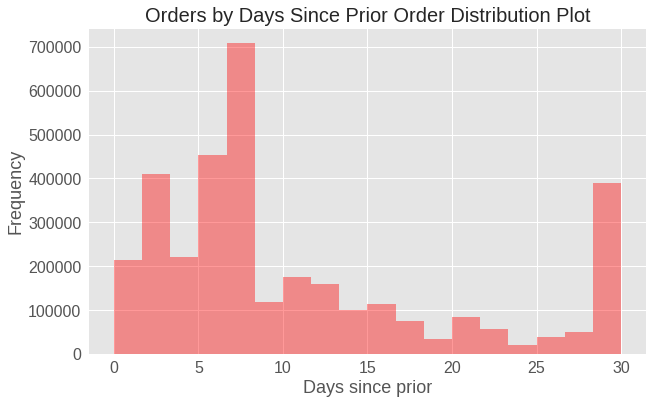

In [5]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

sns.distplot(orders.days_since_prior_order, bins=18, kde=False, color='red')

plt.xlabel('Days since prior', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Orders by Days Since Prior Order Distribution Plot', fontsize=20)
plt.show()

## How many items do people buy?

In [6]:
order_products_train = pd.read_csv('order_products_train.csv')
order_products_train.shape

(1384617, 4)

In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
print('Number of unique orders in the train set: {}'.format(len(order_products_train.order_id.unique())))

Number of unique orders in the train set: 131209


In [9]:
print('Number of unique products in the train set: {}'.format(len(order_products_train.product_id.unique())))

Number of unique products in the train set: 39123


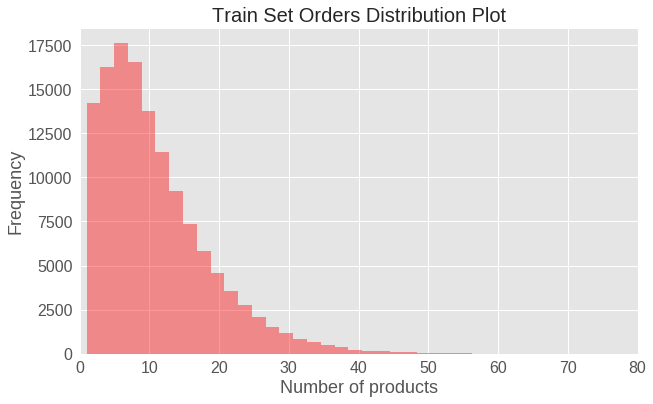

In [10]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

data = order_products_train.groupby('order_id')['add_to_cart_order'].aggregate('max')
sns.distplot(data, bins=40, kde=False, color='red')

plt.xlabel('Number of products', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Train Set Orders Distribution Plot', fontsize=20)
plt.xlim([0, 80])
plt.show()

In [11]:
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_prior.shape

(32434489, 4)

In [12]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
print('Number of unique orders in the prior set: {}'.format(len(order_products_prior.order_id.unique())))

Number of unique orders in the prior set: 3214874


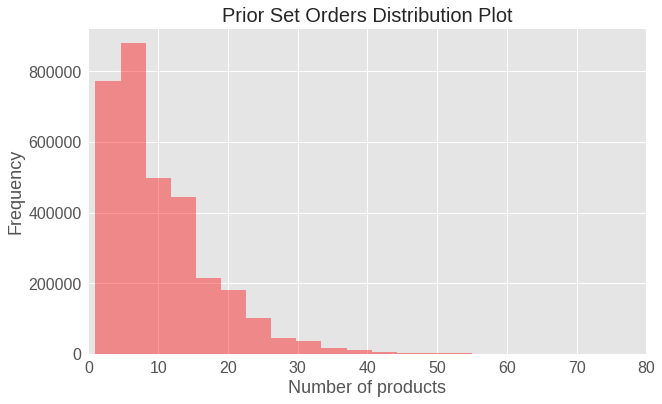

In [14]:
fig = plt.figure(figsize=(10,6))
plt.tick_params(labelsize=16)

data = order_products_prior.groupby('order_id')['add_to_cart_order'].aggregate('max')
sns.distplot(data, bins=40, kde=False, color='red')

plt.xlabel('Number of products', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Prior Set Orders Distribution Plot', fontsize=20)
plt.xlim([0, 80])
plt.show()

## Best Selling Products

In [15]:
products = pd.read_csv('products.csv')
products.shape

(49688, 4)

In [16]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
print('Number of unique products: {}'.format(len(products.product_id.unique())))

Number of unique products: 49688


In [18]:
best_selling_products = order_products_train.groupby(
    'product_id')['add_to_cart_order'].agg(['count']).reset_index()

best_selling_products = pd.merge(products[['product_id', 'product_name']], best_selling_products)
best_selling_products.nlargest(10, columns='count')

,product_id,product_name,count
19574,24852,Banana,18726
10367,13176,Bag of Organic Bananas,15480
16685,21137,Organic Strawberries,10894
17300,21903,Organic Baby Spinach,9784
37499,47626,Large Lemon,8135
37609,47766,Organic Avocado,7409
37164,47209,Organic Hass Avocado,7293
13228,16797,Strawberries,6494
20648,26209,Limes,6033
22024,27966,Organic Raspberries,5546


In [19]:
aisles = pd.read_csv('aisles.csv')
aisles.shape

(134, 2)

In [20]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [21]:
departments = pd.read_csv('departments.csv')
departments.shape

(21, 2)

In [22]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Which item do people put into the cart first?

In [23]:
products_to_cart_first = order_products_train[order_products_train['add_to_cart_order']==1]
products_to_cart_first = pd.merge(products, products_to_cart_first)

products_to_cart_first.groupby(
    'product_name')['add_to_cart_order'].agg(['count']).reset_index().nlargest(10, columns='count')

,product_name,count
1264,Banana,4605
1180,Bag of Organic Bananas,3889
11792,Organic Whole Milk,1144
10035,Organic Avocado,995
11520,Organic Strawberries,900
10055,Organic Baby Spinach,869
10754,Organic Hass Avocado,797
15344,Spring Water,730
15508,Strawberries,707
15186,Sparkling Water Grapefruit,647


## Reordered products

In [24]:
print('Number of reordered products: {}'.format(order_products_train.reordered.sum()))

Number of reordered products: 828824


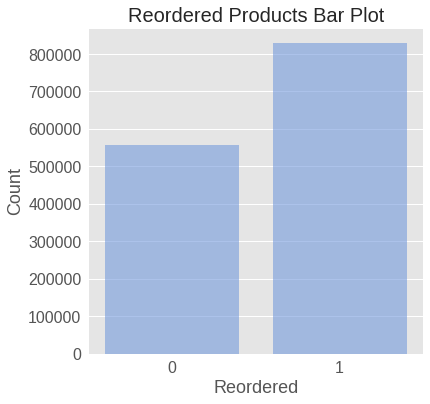

In [25]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

data = order_products_train.groupby('reordered')['product_id'].aggregate(
    {'total': 'count'}).reset_index()
data['ratio'] = data.total.apply(lambda x: x / data.total.sum())

sns.barplot(data.index, data.total, color='cornflowerblue', alpha=0.6)

plt.xlabel('Reordered', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Reordered Products Bar Plot', fontsize=20)
plt.show()